# RAG básico passo à passo

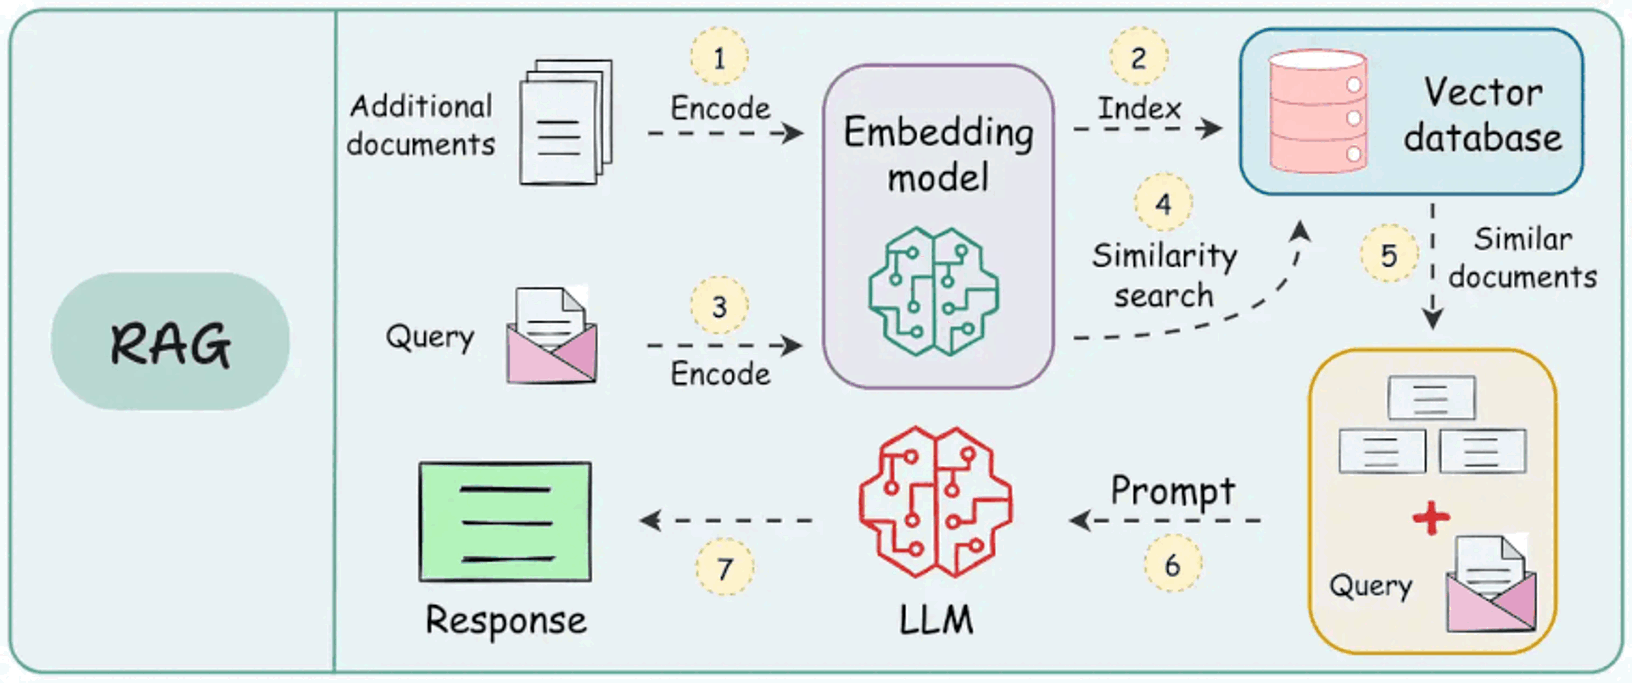

## 0. Instalar dependências

In [1]:
!pip install -U langchain-community unstructured langchain-huggingface chromadb replicate langchain-openai

  Using cached langchain_community-0.3.20-py3-none-any.whl.metadata (2.4 kB)
  Using cached unstructured-0.17.2-py3-none-any.whl.metadata (24 kB)
  Using cached langchain_huggingface-0.1.2-py3-none-any.whl.metadata (1.3 kB)
  Using cached chromadb-0.6.3-py3-none-any.whl.metadata (6.8 kB)
  Using cached langchain_openai-0.3.11-py3-none-any.whl.metadata (2.3 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached opentelemetry_exporter_otlp_proto_grpc-1.31.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached opentelemetry_instrumentation_fastapi-0.52b1-py3-none-any.whl.metadata (2.2 kB)
  Using cached kubernetes-32.0.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached langchain_core-0.3.49-py3-none-any.whl.metadata (5.9 kB)
  Using cached opentelemetry_instrumentation_asgi-0.52b1-py3-none-any.whl.metadata (2.1 kB)
  Using cached opentelemetry_instrumentation-0.52b1-py3-none-any.whl.met

## 1. Baixar documentos e vetorizar com Embeddings

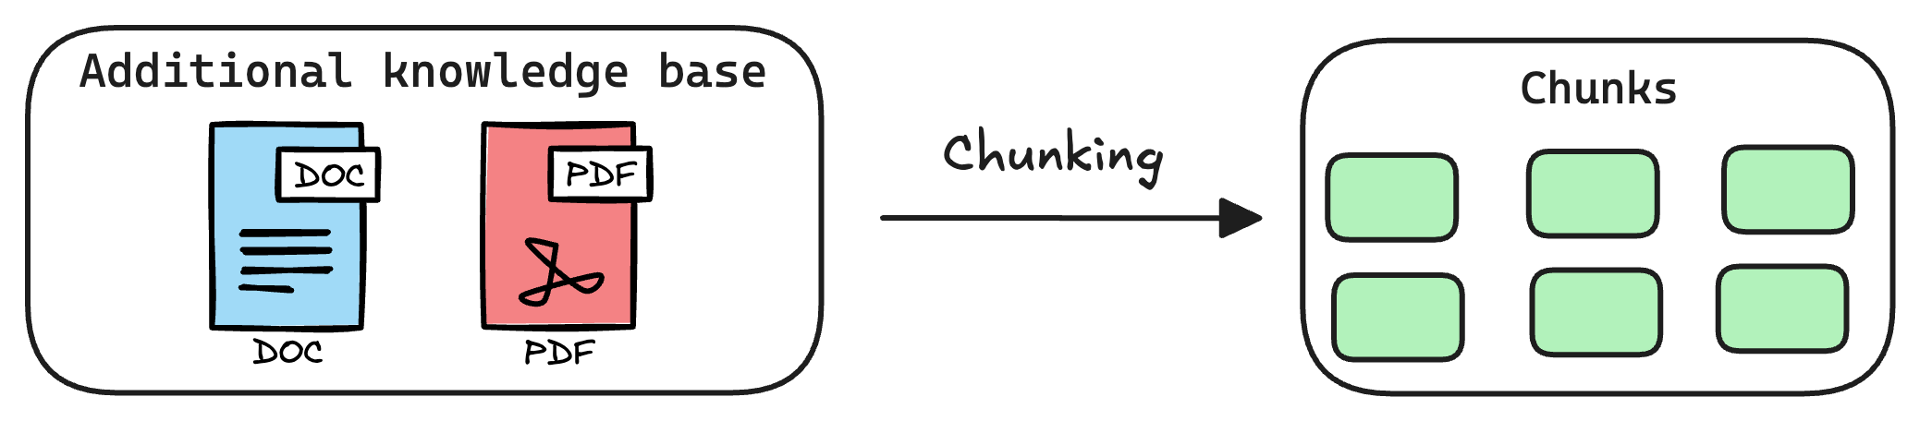

In [2]:
# download das fontes de informação
from langchain_community.document_loaders import UnstructuredURLLoader

urls = [
    "https://canaldareceita.com.br/como-fazer/crepioca-simples-com-ovo/",
    "https://www.tuasaude.com/receitas-de-crepioca-para-emagrecer/"
]

loader = UnstructuredURLLoader(urls=urls)
docs = loader.load()

In [3]:
len(docs)

2

In [4]:
docs

[Document(metadata={'source': 'https://canaldareceita.com.br/como-fazer/crepioca-simples-com-ovo/'}, page_content='Categorias\n\nLanches\n\nCrepioca Simples com Ovo\n\nAutor do post Por Canal da Receita\n\nData de publicação 4 de fevereiro de 2025, às 10:21\n\n\n\nEntre em nosso Grupo no WhatsApp e receba receitas fresquinhas no seu celular!\n\n(11)\n\nA crepioca é uma opção saudável e prática para quem deseja uma refeição nutritiva, saborosa e rápida. Uma mistura de crepe e tapioca, ela leva como base a goma de tapioca e ovos, oferecendo uma consistência leve e macia. Se você busca algo simples e delicioso, a crepioca com ovo é uma excelente escolha. Vamos ao passo a passo da receita.\n\nIngredientes:\n\n2 colheres de sopa de goma de tapioca\n\n1 ovo\n\nSal a gosto\n\nPimenta-do-reino (opcional)\n\nQueijo ralado ou ervas finas (opcional, para dar um toque especial)\n\nModo de Preparo:\n\nPreparando a mistura: Em uma tigela pequena, coloque as 2 colheres de sopa de goma de tapioca. Acr

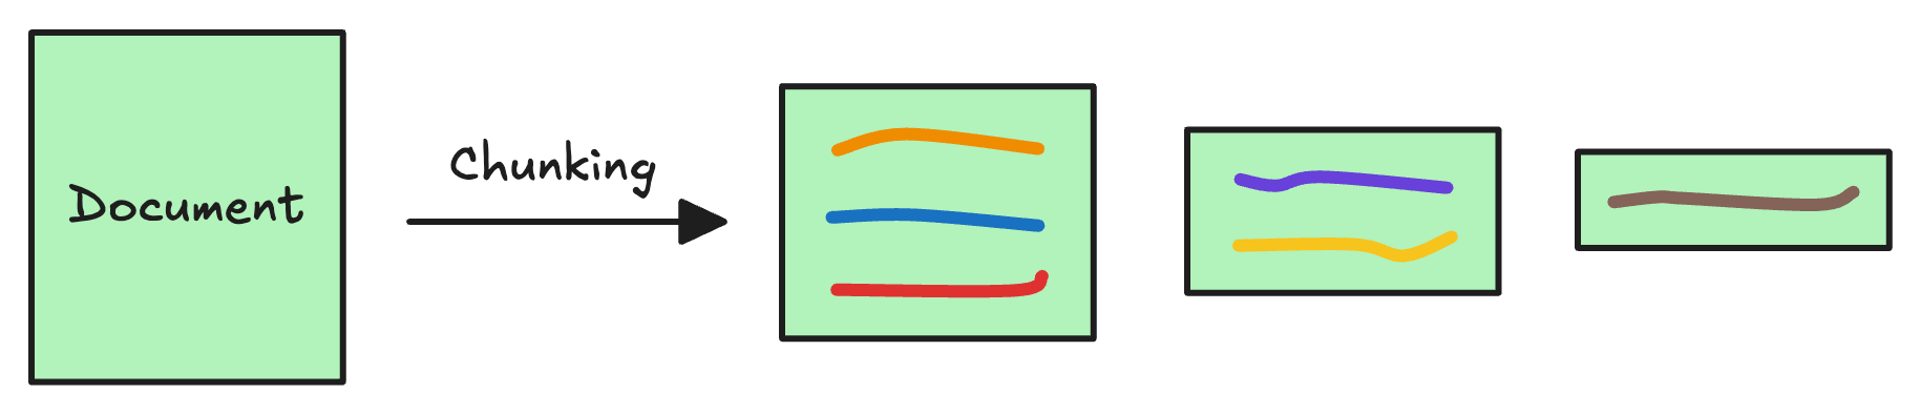

In [5]:
# quebrar os dados em chunks
from langchain.text_splitter import RecursiveCharacterTextSplitter #CharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)
chunks = text_splitter.split_documents(docs)

In [6]:
len(chunks)

25

In [7]:
chunks[:3]

[Document(metadata={'source': 'https://canaldareceita.com.br/como-fazer/crepioca-simples-com-ovo/'}, page_content='Categorias\n\nLanches\n\nCrepioca Simples com Ovo\n\nAutor do post Por Canal da Receita\n\nData de publicação 4 de fevereiro de 2025, às 10:21\n\n\n\nEntre em nosso Grupo no WhatsApp e receba receitas fresquinhas no seu celular!\n\n(11)'),
 Document(metadata={'source': 'https://canaldareceita.com.br/como-fazer/crepioca-simples-com-ovo/'}, page_content='(11)\n\nA crepioca é uma opção saudável e prática para quem deseja uma refeição nutritiva, saborosa e rápida. Uma mistura de crepe e tapioca, ela leva como base a goma de tapioca e ovos, oferecendo uma consistência leve e macia. Se você busca algo simples e delicioso, a crepioca com ovo é uma excelente escolha. Vamos ao passo a passo da receita.\n\nIngredientes:\n\n2 colheres de sopa de goma de tapioca\n\n1 ovo\n\nSal a gosto\n\nPimenta-do-reino (opcional)'),
 Document(metadata={'source': 'https://canaldareceita.com.br/como-

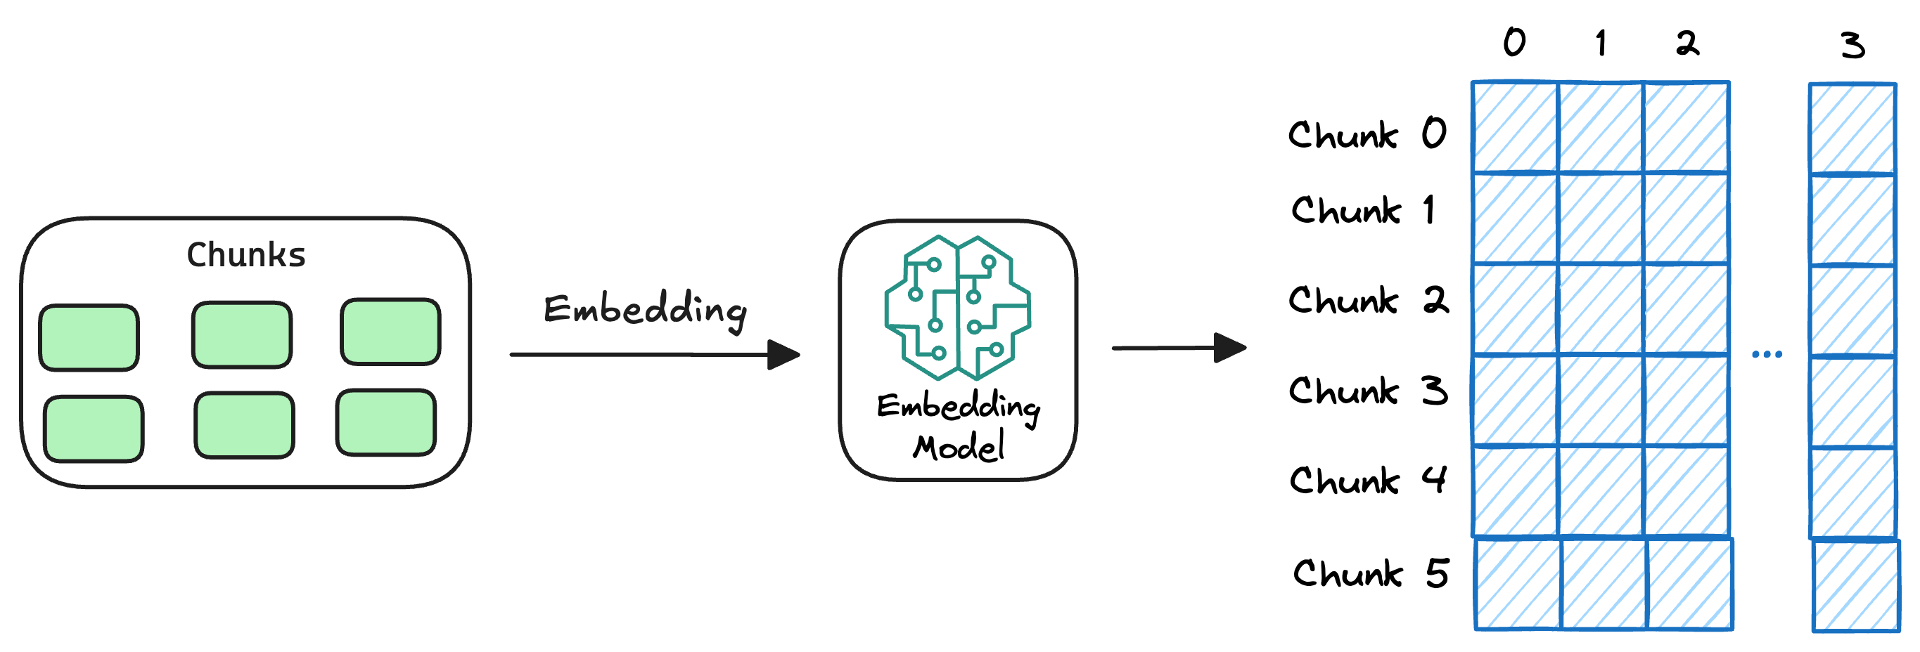

In [8]:
# escolher, baixar do HuggingFace e configurar modelo de Embeddings
from langchain_huggingface import HuggingFaceEmbeddings
from transformers import AutoTokenizer

embeddings_model_path = "ibm-granite/granite-embedding-107m-multilingual"
embeddings_model = HuggingFaceEmbeddings(
    model_name=embeddings_model_path,
)
embeddings_tokenizer = AutoTokenizer.from_pretrained(embeddings_model_path)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/611k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/697 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/214M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/238 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [9]:
chunks[0].page_content

'Categorias\n\nLanches\n\nCrepioca Simples com Ovo\n\nAutor do post Por Canal da Receita\n\nData de publicação 4 de fevereiro de 2025, às 10:21\n\n\n\nEntre em nosso Grupo no WhatsApp e receba receitas fresquinhas no seu celular!\n\n(11)'

In [10]:
embeddings_model.embed_documents(chunks[0].page_content)

Output hidden; open in https://colab.research.google.com to view.

## 2. Indexar documentos no bando de dados vetorial

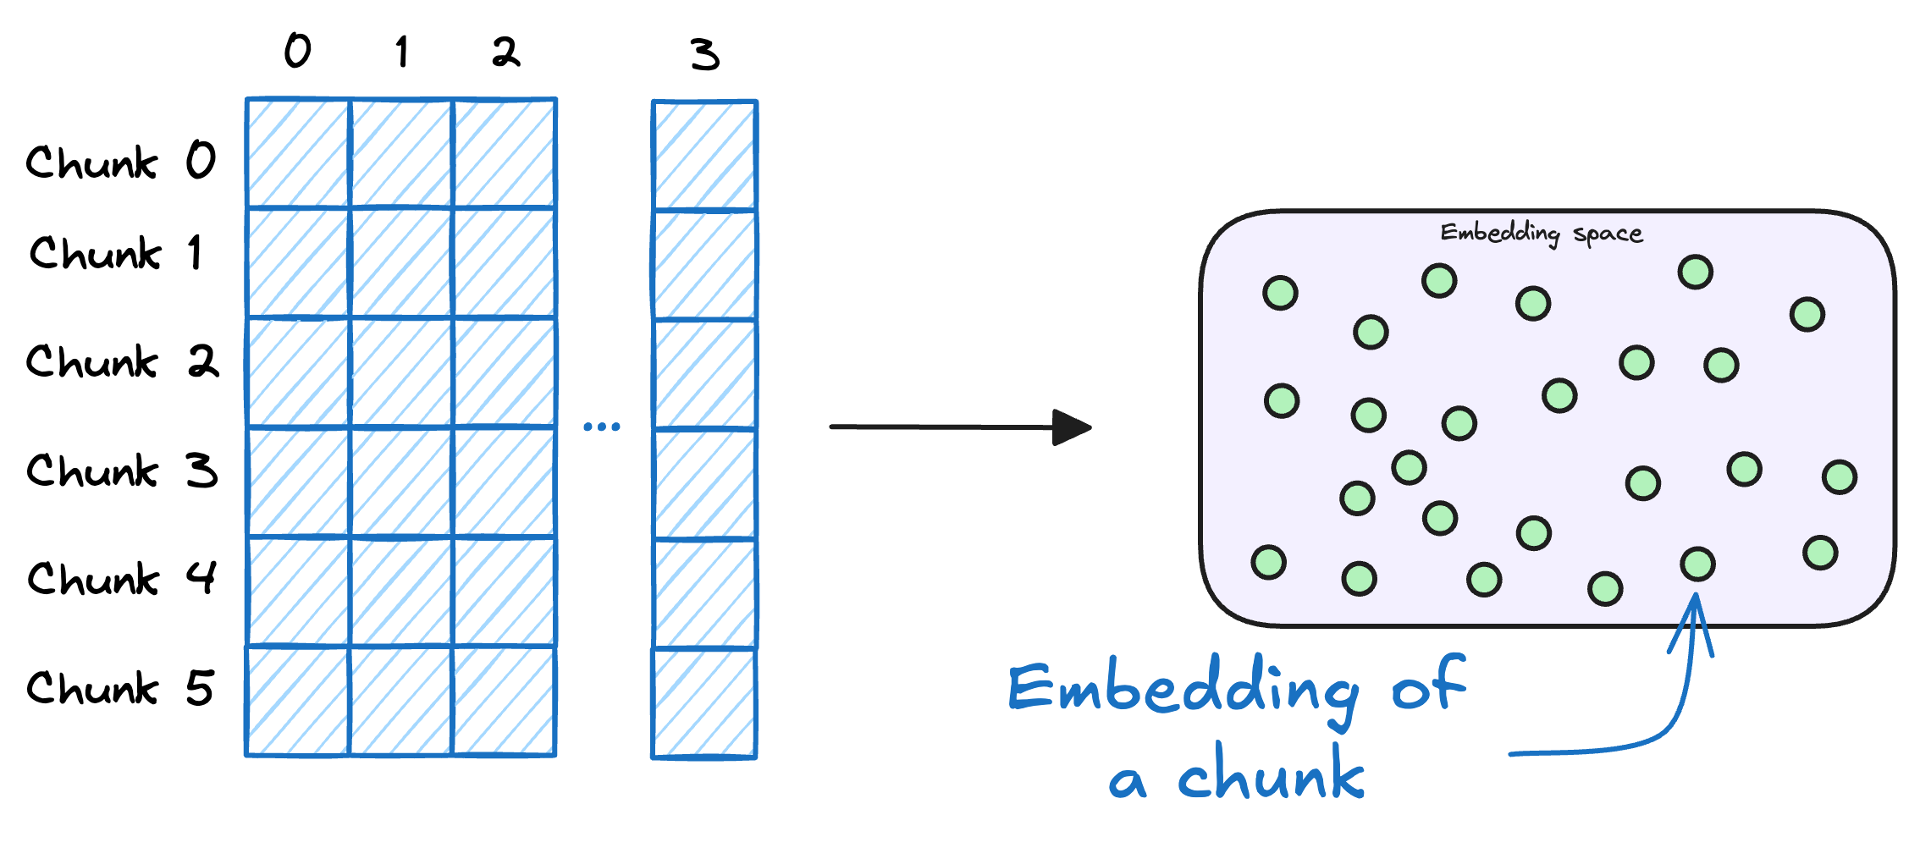

In [11]:
# Criar banco vetorial na memória
from langchain_community.vectorstores import Chroma

vectorstore = Chroma.from_documents(documents=chunks,
                                    embedding=embeddings_model)

In [12]:
retriever = vectorstore.as_retriever()

In [13]:
# text
retriever.invoke("quantos gramas de farinha")

[Document(metadata={'source': 'https://canaldareceita.com.br/como-fazer/crepioca-simples-com-ovo/'}, page_content='Categorias\n\nLanches\n\nCrepioca Simples com Ovo\n\nAutor do post Por Canal da Receita\n\nData de publicação 4 de fevereiro de 2025, às 10:21\n\n\n\nEntre em nosso Grupo no WhatsApp e receba receitas fresquinhas no seu celular!\n\n(11)'),
 Document(metadata={'source': 'https://www.tuasaude.com/receitas-de-crepioca-para-emagrecer/'}, page_content='compartilhe\n\n97% dos leitores acham este conteúdo útil (38 avaliações nos últimos 12 meses)\n\nVocê não está sozinho!\n\nConte com a ajuda de profissionais especializados e receba a atenção que a sua saúde merece.\n\nParceria com agende sua consulta online\n\nDisponível em: São Paulo, Rio de Janeiro, Distrito Federal, Pernambuco, Bahia, Maranhão, Pará, Paraná, Sergipe e Ceará.'),
 Document(metadata={'source': 'https://www.tuasaude.com/receitas-de-crepioca-para-emagrecer/'}, page_content='Componentes 1 crepioca simples Energia 1

## 3. Receber consulta do usuário e fazer Embedding

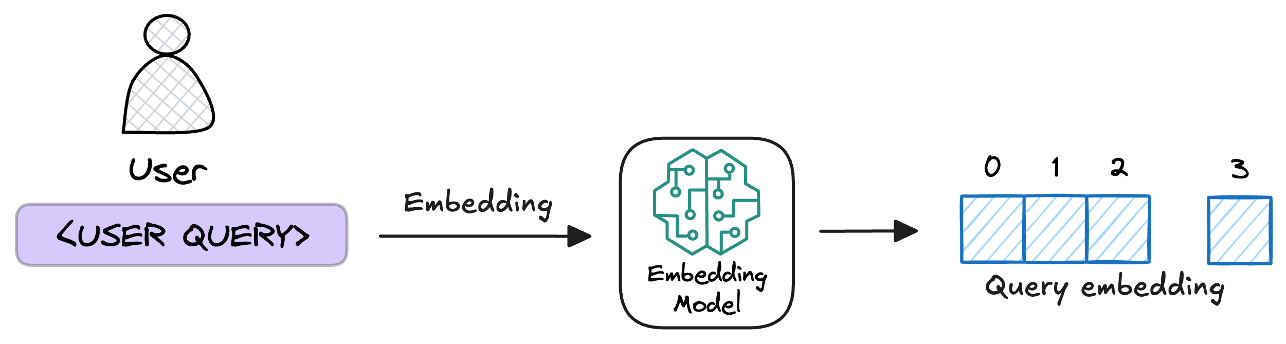

In [14]:
query = "Como fazer uma crepioca?"

query_embed = embeddings_model.embed_documents(query)
query_embed

[[0.019674692302942276,
  0.07271209359169006,
  -0.010341659188270569,
  0.041864100843667984,
  0.0696125477552414,
  -0.002424251288175583,
  0.02996007166802883,
  -0.006794918794184923,
  0.08047782629728317,
  -0.026351172477006912,
  -0.047143712639808655,
  0.023803073912858963,
  0.06140606850385666,
  0.057186245918273926,
  -0.006101242732256651,
  0.0762755498290062,
  -0.002954211551696062,
  -0.010212601162493229,
  0.13398364186286926,
  0.022063927724957466,
  -0.04276279732584953,
  0.02487071044743061,
  0.03000151738524437,
  0.024046611040830612,
  -0.18707586824893951,
  0.07173869758844376,
  0.11775115877389908,
  0.017601612955331802,
  0.03980053961277008,
  0.008819960057735443,
  -0.0006377183017320931,
  0.031903255730867386,
  -0.0073834131471812725,
  -0.10566321015357971,
  0.013262598775327206,
  0.04942495375871658,
  0.033578142523765564,
  0.042243048548698425,
  0.0017216595588251948,
  -0.0072382064536213875,
  0.02934749238193035,
  0.0045518553815

## 4. Buscar Embeddings da consulta no banco vetorial

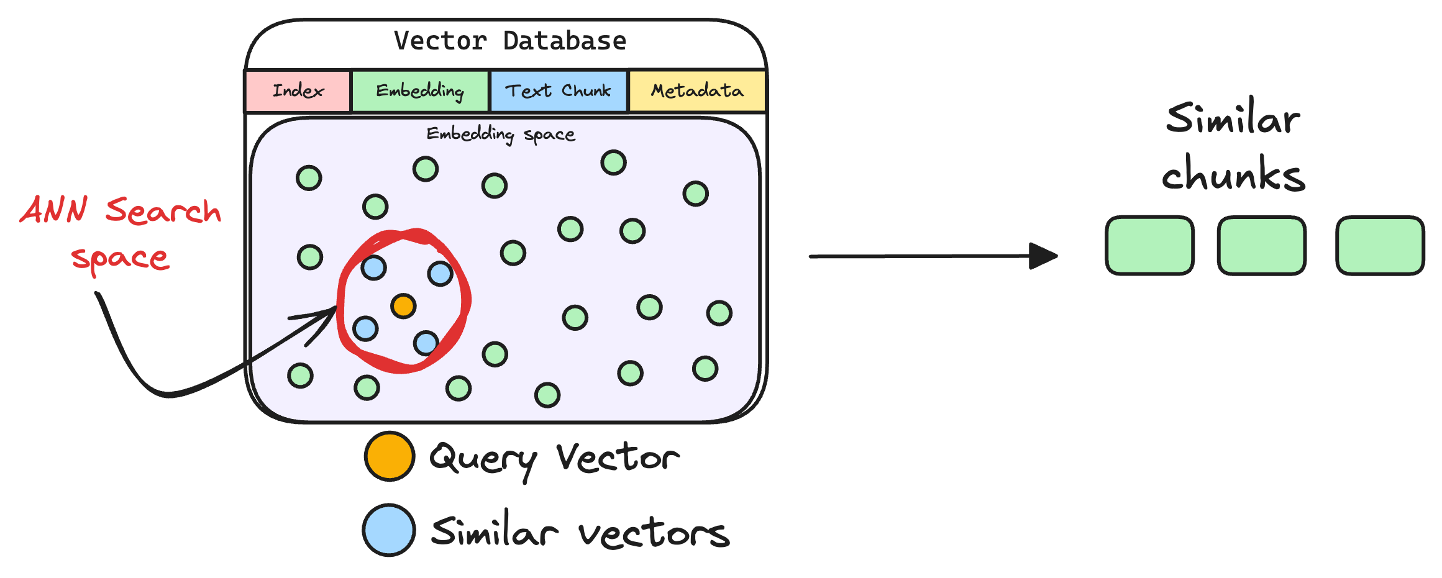

In [15]:
similar_chunks = retriever.invoke(query)
similar_chunks

[Document(metadata={'source': 'https://www.tuasaude.com/receitas-de-crepioca-para-emagrecer/'}, page_content='Como fazer a crepioca\n\nPara fazer a crepioca, basta misturar em uma tigela pequena 1 a 2 colheres de goma de tapioca, 1 ovo e sal. Em seguida, misturar todos os ingredientes com um garfo, até ficar bem homogêneo.\n\nLevar uma frigideira ao fogo e, quando estiver bem quente, despejar a mistura e deixar dourar. Virar do outro lado e cozinhar por cerca de 3 minutos ou até dourar. Servir em seguida, ao natural ou com os recheios de preferência.\n\nReceitas de crepioca'),
 Document(metadata={'source': 'https://www.tuasaude.com/receitas-de-crepioca-para-emagrecer/'}, page_content='Cozinhar por cerca de 2 minutos ou até ficar levemente dourado e, em seguida, virar para cozinhar do outro lado. Transferir a crepioca para um prato. Cortar a banana em rodelas, colocar sobre a crepioca e polvilhar com a canela em pó.\n\n2. Crepioca com queijo\n\nIngredientes:\n\n1 ovo\n\n2 colheres (de s

## 5. Resgatar os documentos similares do banco

In [16]:
similar_texts = [ chunk.page_content for chunk in similar_chunks ]
similar_texts

['Como fazer a crepioca\n\nPara fazer a crepioca, basta misturar em uma tigela pequena 1 a 2 colheres de goma de tapioca, 1 ovo e sal. Em seguida, misturar todos os ingredientes com um garfo, até ficar bem homogêneo.\n\nLevar uma frigideira ao fogo e, quando estiver bem quente, despejar a mistura e deixar dourar. Virar do outro lado e cozinhar por cerca de 3 minutos ou até dourar. Servir em seguida, ao natural ou com os recheios de preferência.\n\nReceitas de crepioca',
 'Cozinhar por cerca de 2 minutos ou até ficar levemente dourado e, em seguida, virar para cozinhar do outro lado. Transferir a crepioca para um prato. Cortar a banana em rodelas, colocar sobre a crepioca e polvilhar com a canela em pó.\n\n2. Crepioca com queijo\n\nIngredientes:\n\n1 ovo\n\n2 colheres (de sopa) de goma de tapioca;\n\n1 fatia de queijo muçarela picado;\n\nSal a gosto.\n\nModo de preparo:',
 'Componentes 1 crepioca simples Energia 146 calorias Proteínas 4,16 g Gorduras 3,48 g Carboidratos 24,55 g Fibras 0

In [17]:
sources = list(set([ chunk.metadata['source'] for chunk in similar_chunks ]))
sources

['https://www.tuasaude.com/receitas-de-crepioca-para-emagrecer/']

## 6. Aumentar o prompt com consulta e documentos

In [23]:
prompt_template = "Considerando os textos abaixo:\n\n{}\n\nResponda a pergunta: {}"
prompt = prompt_template.format("\n".join(similar_texts), query)

## 7. Gerar a Resposta

In [31]:
import os
from replicate.client import Client
from google.colab import userdata

# You can create a token at https://replicate.com/account/api-tokens
# get $0.50 credit with https://replicate.com/invites/a8717bfe-2f3d-4a52-88ed-1356231cdf03
os.environ["REPLICATE_API_TOKEN"] = userdata.get('REPLICATE_API_TOKEN')

replicate = Client(
  api_token=os.environ["REPLICATE_API_TOKEN"],
  headers={
    "User-Agent": "replicate-google-colab-example/1.0"
  }
)

model_name = "ibm-granite/granite-3.2-8b-instruct"

# rodando sem RAG, apenas a query
def generate(query):
  output = replicate.run(
      model_name,
      input={ "prompt": query }
  )

  return "".join(output)

def no_rag(query):
  return generate(query)

def rag(query):
  # retrieve
  similar_texts = [ c.page_content for c in retriever.invoke(query) ]
  # augment
  prompt = prompt_template.format("\n".join(similar_texts), query)
  # generate
  return generate(query)

In [26]:
query

'Como fazer uma crepioca?'

In [32]:
no_rag(query)

'Aqui está uma receita simples de crepe (crepioca) para você:\n\nIngredientes:\n- 1 xícara de farinha de trigo\n- 2 ovos\n- 1 1/2 xícaras de leite\n- 2 colheres de sopa de azeite\n- Sal a gosto\n\nInstruções:\n\n1. Em uma tigela grande, misture a farinha de trigo e os ovos. Adicione o leite gradualmente, mexendo até que a mistura fique lisa e sem grumos.\n\n2. Adicione o azeite e sal a gosto. Continue mexendo até que todos os ingredientes estejam bem combinados.\n\n3. Deixe a massa descansar por pelo menos 30 minutos na geladeira. Isso ajuda a tornar a massa mais macia e fácil de trabalhar.\n\n4. Após o descanso, aqueça uma frigideira antiaderente em fogo médio. Unte levemente com um pouco de azeite ou manteiga.\n\n5. Use uma concha ou copo pequeno para colocar uma pequena quantidade de massa na frigideira, girando-a para cobrir o fundo uniformemente.\n\n6. Cozinhe a crepe até que os bordos comecem a dourar e levantar, geralmente cerca de 1 a 2 minutos.\n\n7. Com uma espátula, vire a c

In [28]:
rag(query)

'Para fazer uma crepioca, você pode seguir o método básico descrito nos textos acima. Aqui está uma versão simplificada dos passos:\n\n1. Em uma tigela pequena, bata um ovo.\n2. Adicione 1 a 2 colheres de sopa de goma de tapioca, sal e, se desejar, outros ingredientes como queijo ou frango.\n3. Misture todos os ingredientes até obter uma mistura homogênea.\n4. Aqueça uma frigideira antiaderente no fogo. Quando estiver bem quente, despeje a mistura.\n5. Deixe a crepioca cozinhar por cerca de 2 a 3 minutos em cada lado, até ficar dourada.\n6. Vire a crepioca com cuidado e cozinhe o outro lado por mais 2 a 3 minutos.\n7. Transfira a crepioca para um prato e sirva imediatamente, opcionalmente com recheios de sua preferência.\n\nLembre-se de que as quantidades de ingredientes podem variar conforme a sua preferência de sabor e consistência. Algumas receitas podem incluir mais ou menos goma de tapioca, ou adicionar outros ingredientes como queijo, frango, banana ou canela, dependendo do seu g

In [29]:
rag("Quantos gols a Argentina fez no Brasil?")

'Desculpe pela confusão, mas a pergunta que você fez não está relacionada aos textos fornecidos. Os textos discutem uma receita de crepioca simples com ovo. Não há menção a jogos de futebol ou gols entre Argentina e Brasil.\n\nAqui está a receita de crepioca simples com ovo:\n\n**Crepioca Simples com Ovo**\n\n**Categorias:** Lanches\n\n**Autor do post:** Canal da Receita\n\n**Data de publicação:** 4 de fevereiro de 2025, às 10:21\n\n**Ingredientes:**\n\n- 1 ovo\n- Goma de tapioca (quantidade não especificada)\n- Queijo (quantidade não especificada)\n- Sal (a gosto)\n\n**Modo de preparo:**\n\n1. Em um recipiente fundo, bater bem o ovo com o garfo.\n2. Adicionar a goma de tapioca, o queijo e o sal, misturando bem.\n3. Levar para assar dos dois lados em frigideira preaquecida no fogo.\n4. Transferir para um prato e servir em seguida.\n\nSe você tiver outras perguntas sobre receitas ou qualquer outro assunto, sinta-se à vontade para perguntar!'

In [30]:
rag("qual o principal ingrediente de uma crepioca?")

'O principal ingrediente de uma crepioca é a goma de tapioca. A receita básica requer 1 a 2 colheres de sopa de goma de tapioca, 1 ovo e sal. A goma de tapioca é uma fonte de carboidratos complexos e fornece energia para o corpo. Além disso, a crepioca é rica em proteínas, vitaminas e minerais, como a luteína e a zeaxantina, que são benéficos para a saúde dos olhos.'

In [33]:
no_rag("qual o principal ingrediente de uma crepioca?")

'O principal ingrediente de uma crepe é a farinha de trigo. No entanto, as crepes também requerem ovos, leite e manteiga para obter a consistência e sabor característicos.'

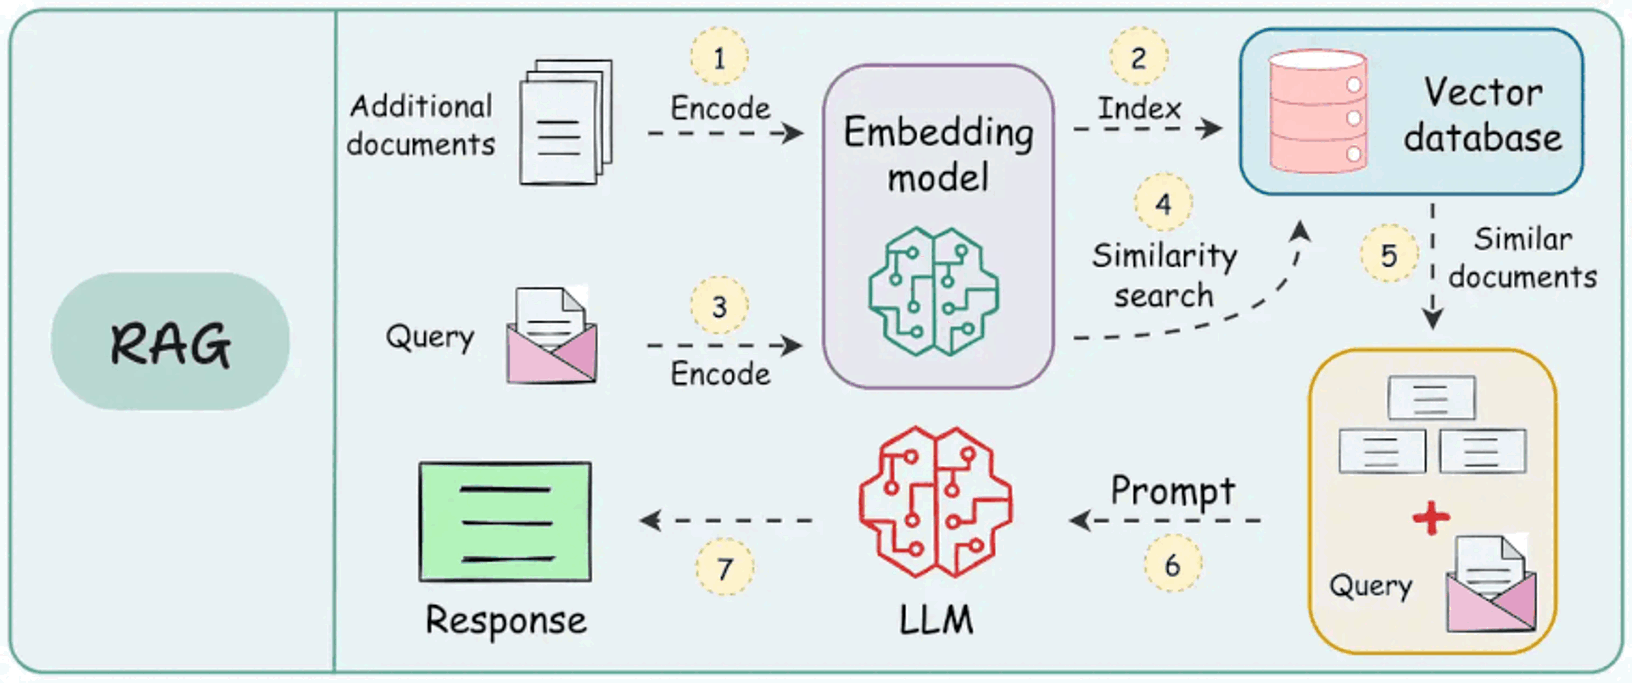